In [120]:
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
RAW_COLUMNS = ['RAW_TP9', 'RAW_AF7', 'RAW_AF8']
sampling_rate = 256
info = mne.create_info(RAW_COLUMNS, sampling_rate, ch_types = 'eeg')
tmin = 0
tmax = 0.5

In [164]:
scared = "scared.csv"
df = pd.read_csv(scared)
chill = "chill.csv"
df_chill = pd.read_csv(chill)
chill_eric = "chill_eric.csv"
df_chill_eric = pd.read_csv(chill_eric)

In [65]:
print(df.columns)

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X',
       'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8',
       'HSI_TP10', 'Battery', 'Elements'],
      dtype='object')


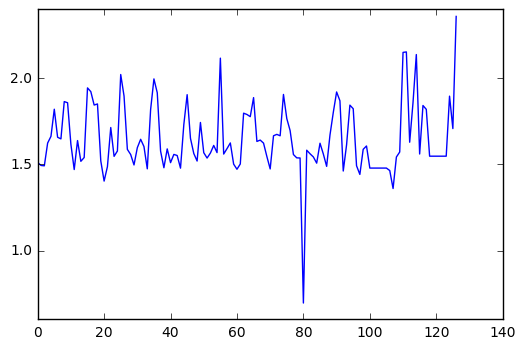

In [74]:

alphas = np.array(df_chill_eric['Alpha_AF7']).T
xs = range(alphas.shape[0])
graph = plt.plot(xs, alphas)

In [165]:
df = df[RAW_COLUMNS]
df_chill = df_chill[RAW_COLUMNS]
df_chill_eric = df_chill_eric[RAW_COLUMNS]

In [166]:
scared_data = np.nan_to_num(np.array(df).T)
chill_data = np.nan_to_num(np.array(df_chill).T)
chill_data_eric = np.nan_to_num(np.array(df_chill_eric).T)

In [167]:
custom_raw = mne.io.RawArray(scared_data, info)
custom_raw_chill = mne.io.RawArray(chill_data, info)
custom_raw_chill_eric = mne.io.RawArray(chill_data_eric, info)

custom_raw.crop(tmin, tmax).load_data()
custom_raw_chill.crop(tmin, tmax).load_data()
custom_raw_chill_eric.crop(tmin, tmax).load_data()

Creating RawArray with float64 data, n_channels=3, n_times=174
    Range : 0 ... 173 =      0.000 ...     0.676 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=669
    Range : 0 ... 668 =      0.000 ...     2.609 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=130
    Range : 0 ... 129 =      0.000 ...     0.504 secs
Ready.


<RawArray  |  None, n_channels x n_times : 3 x 129 (0.5 sec), ~15 kB, data loaded>

In [168]:
picks = mne.pick_types(custom_raw_chill_eric.info)
custom_raw_chill_eric.filter(1., 30., h_trans_bandwidth='auto', filter_length='auto',
           phase='zero', picks = [0,1,2])
custom_raw_chill.filter(1., 30., h_trans_bandwidth='auto', filter_length='auto',
           phase='zero', picks = [0,1,2])
custom_raw.filter(1., 30., h_trans_bandwidth='auto', filter_length='auto',
           phase='zero', picks = [0,1,2])

Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 1690 samples (6.602 sec) selected
filter_length (1691) is longer than the signal (129), distortion is likely. Reduce filter length or filter a longer signal.
Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 1690 samples (6.602 sec) selected


<ipython-input-168-8d709403f7d4>:3: RuntimeWarning: filter_length (1691) is longer than the signal (129), distortion is likely. Reduce filter length or filter a longer signal.
  phase='zero', picks = [0,1,2])


filter_length (1691) is longer than the signal (129), distortion is likely. Reduce filter length or filter a longer signal.
Setting up band-pass filter from 1 - 30 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 1690 samples (6.602 sec) selected
filter_length (1691) is longer than the signal (129), distortion is likely. Reduce filter length or filter a longer signal.


<ipython-input-168-8d709403f7d4>:5: RuntimeWarning: filter_length (1691) is longer than the signal (129), distortion is likely. Reduce filter length or filter a longer signal.
  phase='zero', picks = [0,1,2])
<ipython-input-168-8d709403f7d4>:7: RuntimeWarning: filter_length (1691) is longer than the signal (129), distortion is likely. Reduce filter length or filter a longer signal.
  phase='zero', picks = [0,1,2])


<RawArray  |  None, n_channels x n_times : 3 x 129 (0.5 sec), ~15 kB, data loaded>

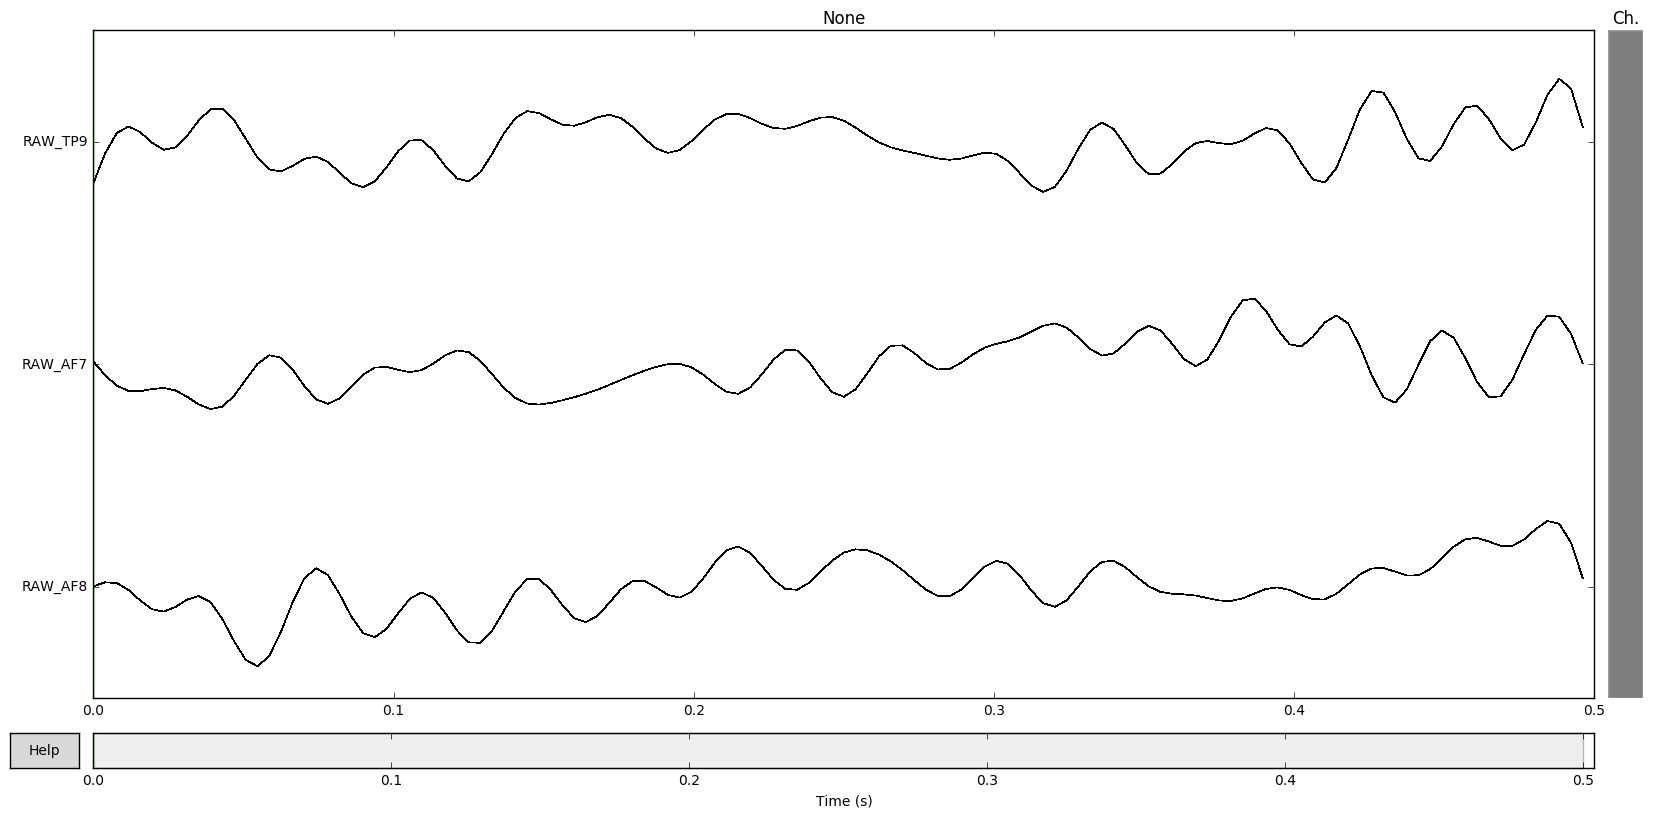

In [169]:
custom_raw_chill_eric.plot(n_channels = 3, scalings = 'auto');

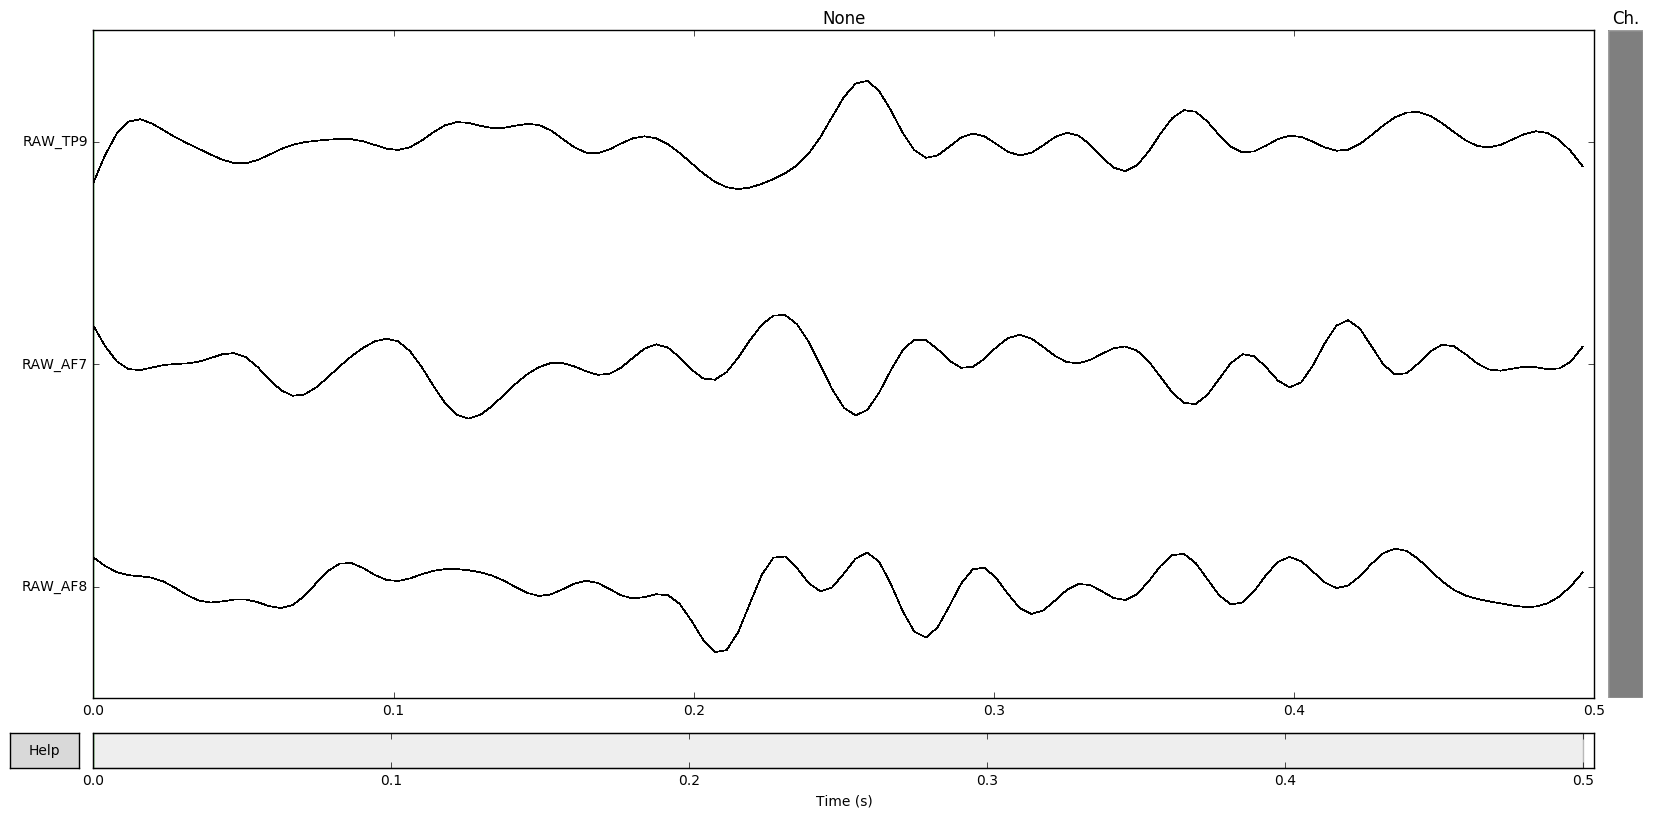

In [170]:
custom_raw_chill.plot(n_channels = 3, scalings = 'auto');

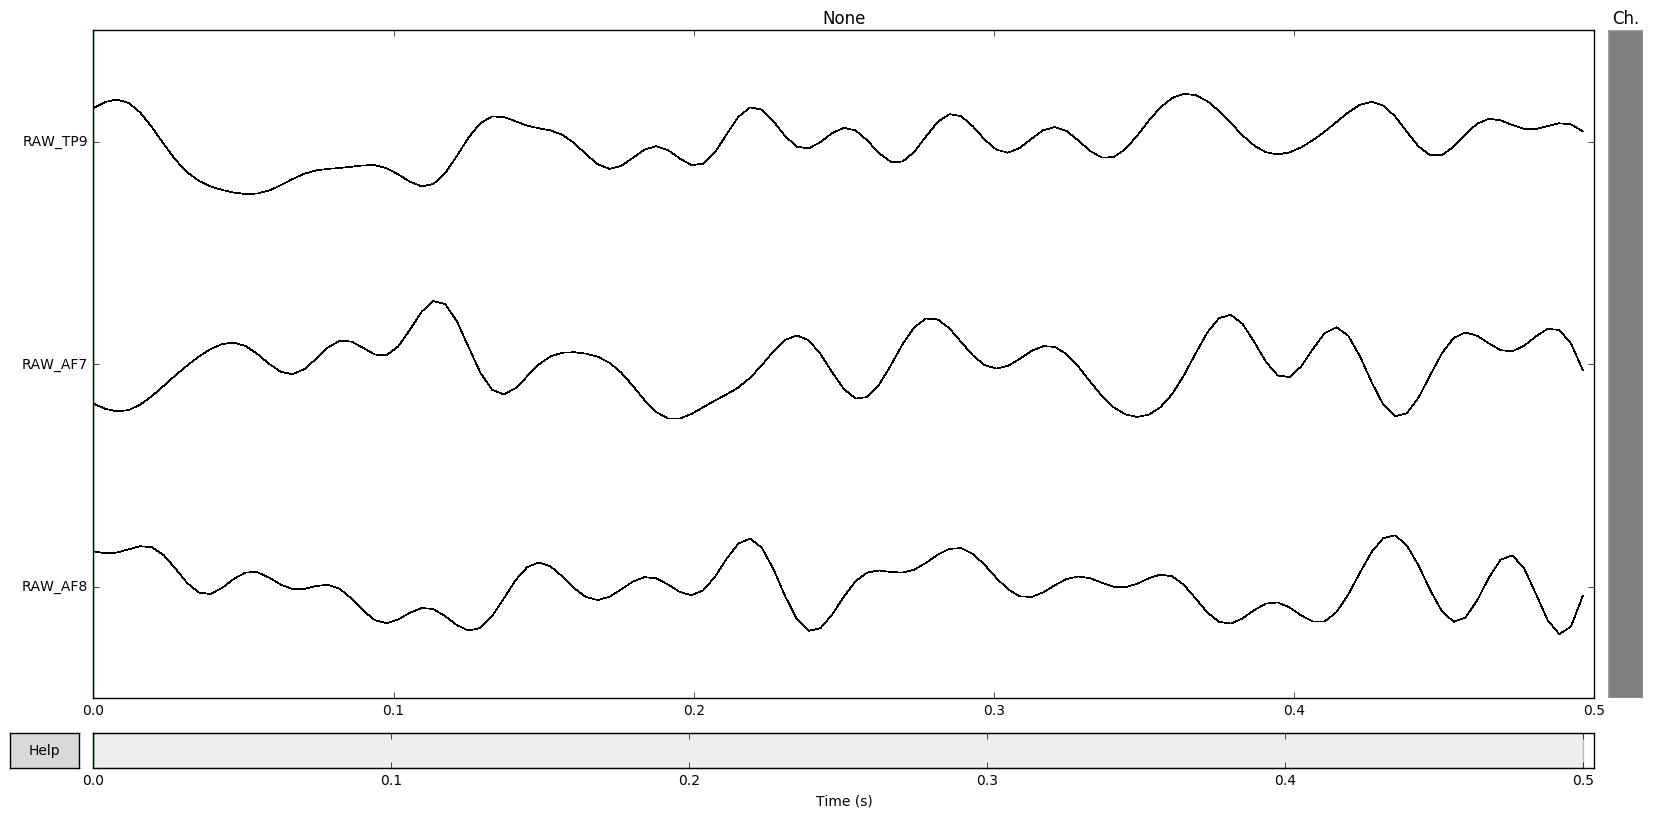

In [171]:
custom_raw.plot(n_channels = 3, scalings = 'auto');

tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning


<ipython-input-185-191a68ac5e4f>:2: DeprecationWarning: tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
  custom_raw.plot_psd(area_mode='range', average=False, picks = [0,1,2], n_fft = 128);


Effective window size : 0.500 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-185-191a68ac5e4f>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  custom_raw.plot_psd(area_mode='range', average=False, picks = [0,1,2], n_fft = 128);


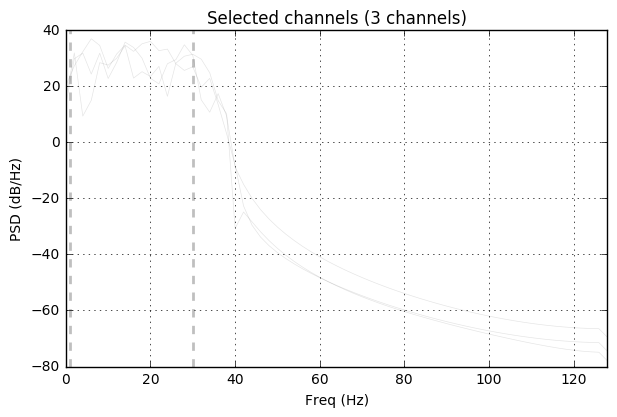

In [185]:
selection = mne.read_selection('')
custom_raw.plot_psd(area_mode='range', average=False, picks = [0,1,2], n_fft = 128);

tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning


<ipython-input-184-8e8af645b807>:2: DeprecationWarning: tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
  custom_raw_chill.plot_psd(area_mode='range', average=False, picks = [0,1,2], n_fft = 128);


Effective window size : 0.500 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-184-8e8af645b807>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  custom_raw_chill.plot_psd(area_mode='range', average=False, picks = [0,1,2], n_fft = 128);


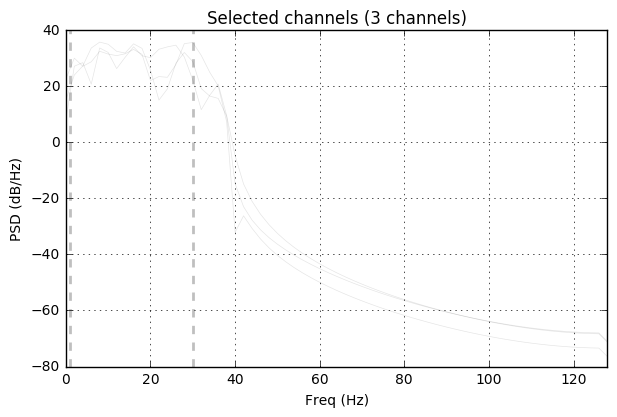

In [184]:
selection = mne.read_selection('')
custom_raw_chill.plot_psd(area_mode='range', average=False, picks = [0,1,2], n_fft = 128);

tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning


<ipython-input-183-818cad4e137c>:2: DeprecationWarning: tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
  custom_raw_chill_eric.plot_psd(area_mode='range', average=False, picks = [0,1,2], n_fft = 128);


Effective window size : 0.500 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-183-818cad4e137c>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  custom_raw_chill_eric.plot_psd(area_mode='range', average=False, picks = [0,1,2], n_fft = 128);


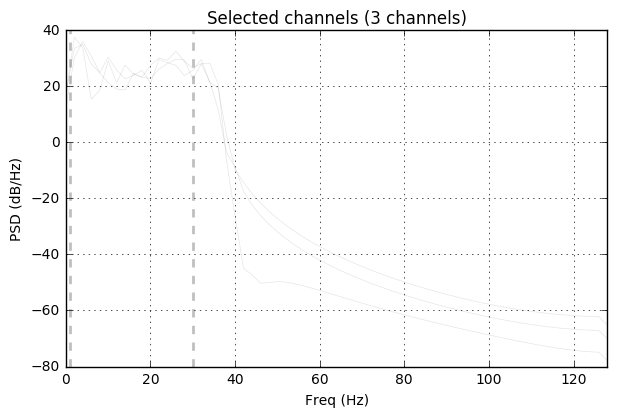

In [183]:
selection = mne.read_selection('')
custom_raw_chill_eric.plot_psd(area_mode='range', average=False, picks = [0,1,2], n_fft = 128);

In [187]:
custom_raw[:]

(array([[ 212.49165826,  264.54585739,  286.55561272,  258.05616123,
          174.63738844,   48.88847365,  -94.81685297, -229.88098431,
         -337.36058181, -411.56905097, -458.73556983, -489.81069782,
         -511.97450312, -524.23010614, -519.79554984, -493.36072395,
         -447.76944572, -394.92307826, -349.78259462, -321.53592026,
         -308.49187969, -300.93904228, -290.38559547, -278.37289376,
         -277.49423706, -302.32376558, -355.50837247, -418.93917332,
         -457.87831161, -437.84208144, -345.03632006, -197.47726495,
          -38.68635292,   83.52276567,  140.93285354,  137.05894632,
          100.27487913,   62.80144203,   39.56914888,   20.92702692,
          -16.23528435,  -87.00163115, -181.97303254, -268.17639596,
         -308.00335022, -284.23510716, -214.19211221, -142.30141467,
         -114.15340288, -147.57104274, -219.11423221, -275.58288117,
         -264.79479085, -167.71920627,  -12.62317851,  137.76222343,
          219.18492176,  200.24666